In [63]:
import os
from PIL import Image

image_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET/TRAIN"
output_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET/TRAIN2"  # Directory to save resized images
desired_size = (224, 224)
desired_size2 = (224, 224)


os.makedirs(output_dir, exist_ok=True)


for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"): 

        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)


        img = img.resize(desired_size2)
        img = img.convert("RGB")
       

        output_path = os.path.join(output_dir, filename)
        img.save(output_path)

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"): 

        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)


        img = img.resize(desired_size)

        

        img.save(os.path.join(image_dir, filename))



In [42]:
image_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET/TEST"

desired_size = (224, 224) 


for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):  
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)

        img = img.resize(desired_size)

        img = img.convert("RGB")

        img.save(os.path.join(image_dir, filename))

In [3]:

import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.transforms import transforms
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.labels_map = {
            "O": 0,  # Organic
            "R": 1   # Recycle
        }
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith(".jpg")]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path)
        label = self.labels_map[img_name[0]]  

        if self.transform:
            image = self.transform(image)

        return image, label


root_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET"

transformers=transforms.Compose({
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    #transforms.Normalize([0.5,0.5,0.5,],[0.5,0.5,0.5,])
})

train_dataset = CustomDataset(root_dir=root_dir + "/TRAIN", transform=transformers)
train2_dataset = CustomDataset(root_dir=root_dir + "/TRAIN2", transform=transformers)
train3_dataset = CustomDataset(root_dir=root_dir + "/TRAIN3", transform=transformers)
test_dataset = CustomDataset(root_dir=root_dir + "/TEST", transform=transformers)

train3_loader = DataLoader(train3_dataset, batch_size=64, shuffle=True)
train2_loader = DataLoader(train2_dataset, batch_size=64, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

/Users/prishamarpu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


/Users/prishamarpu/Library/Python/3.9/lib/python/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


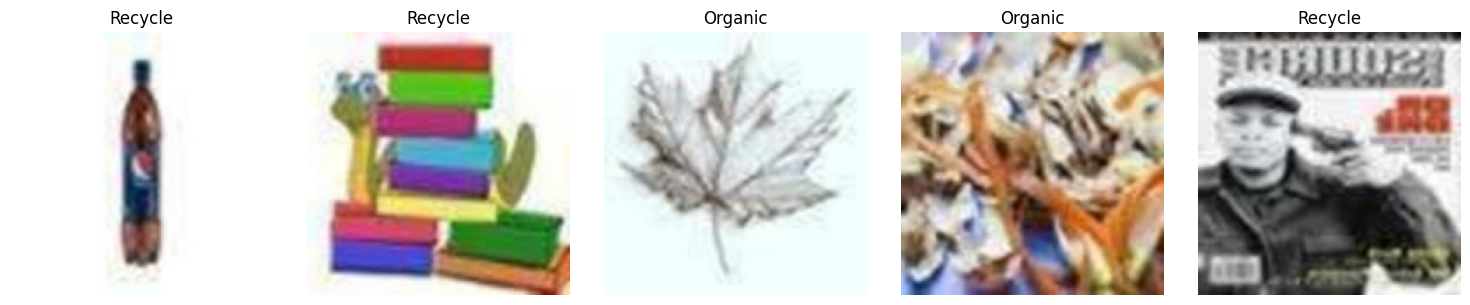

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import random



labels_map = {
    0: "Organic",
    1: "Recycle"
}

num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))

for i in range(num_images_to_plot):
    train_features, train_labels = next(iter(train_loader))

    index = random.randrange(len(train_features))
    img = train_features[index] 
    label_index = train_labels[index].item()
    label = labels_map[label_index]

    img = transforms.functional.to_pil_image(img) 
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()



Feature batch shape: torch.Size([4, 3, 150, 150])
Labels batch shape: torch.Size([4])


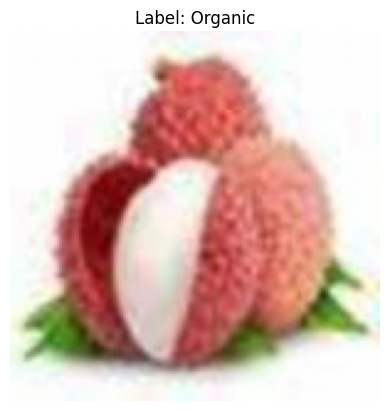

tensor([[[[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961]],

         [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],

         [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0

In [13]:
train_features, train_labels = next(iter(train3_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].numpy().transpose((1, 2, 0)) 
label = train_labels[0]


plt.imshow(img)
plt.axis('off')
if label==0:
    plt.title(f"Label: Organic")
else:
    plt.title(f"Label: Recycle")
plt.show()

print(train_features)

Feature batch shape: torch.Size([64, 3, 150, 150])
Labels batch shape: torch.Size([64])
(150, 150, 3)


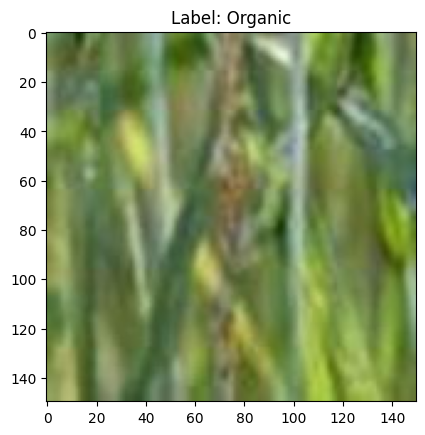

In [18]:
train2_features, train2_labels = next(iter(train2_loader))


img2 = train2_features[0].numpy().transpose((1, 2, 0))  
label2 = train2_labels[0]

print(f"Feature batch shape: {train2_features.size()}")
print(f"Labels batch shape: {train2_labels.size()}")
print(img2.shape)
plt.imshow(img2)
if label2==0:
    plt.title(f"Label: Organic")
else:
    plt.title(f"Label: Recycle")
plt.show()







In [5]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.optim import Adam
from torch.autograd import Variable

In [6]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [7]:
class ConvNet(nn.Module):
    def __init__(self, num_classes = 2):
        super(ConvNet, self).__init__()

        #(64,3,150,150) 
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1) #(64,12,150,150)
        self.bn1 = nn.BatchNorm2d(num_features=12) #(64,12,150,150)
        self.relu1 = nn.ReLU() #(64,12,150,150)
        self.pool = nn.MaxPool2d(kernel_size=2) #(64,12,75,75)

        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1) #(64,20,75,75)
        self.relu2 = nn.ReLU() #(64,20,75,75)

        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=3, stride=1, padding=1) #(64,32,75,75)
        self.bn3 = nn.BatchNorm2d(num_features=32) #(64,32,75,75)
        self.relu3 = nn.ReLU() #(64,32,75,75)

        self.fc = nn.Linear(in_features=32*75*75, out_features=2)

    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)
        output = self.pool(output)

        output = self.conv2(output)
        output = self.relu2(output)
        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)

        output = output.view(-1,32*75*75)
        output = self.fc(output)
        return output


In [8]:
model1 = ConvNet(num_classes=2).to(device)
model1 = model1.to('cpu')
print(model1)

for name, param in model1.named_parameters():
    print(f"Parameter name: {name}, dtype: {param.dtype}")

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=2, bias=True)
)
Parameter name: conv1.weight, dtype: torch.float32
Parameter name: conv1.bias, dtype: torch.float32
Parameter name: bn1.weight, dtype: torch.float32
Parameter name: bn1.bias, dtype: torch.float32
Parameter name: conv2.weight, dtype: torch.float32
Parameter name: conv2.bias, dtype: torch.float32
Parameter name: conv3.weight, dtype: torch.float32
Parameter name: conv3.bias, dtype

In [15]:
optimizer = Adam(model1.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.CrossEntropyLoss()

num_epoches = 5

train2_count=len(train2_loader.sampler)
test_count=len(test_loader.sampler)

print(train2_count, test_count)

22546 2513


In [16]:
best_accuracy = 0.0

for epoch in range(num_epoches):
    model1.train()
    train_accuracy = 0.0
    train_loss = 0.0

    for i, (images, labels) in enumerate(train2_loader):
        if images.dtype != torch.float32:
            images = images.to(torch.double) 

        if torch.cuda.is_available():
            images, labels = images.cuda(), labels.cuda()
        
        optimizer.zero_grad()

        outputs = model1(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.cpu().data * images.size(0)
        prediction = torch.max(outputs.data, 1)[1]
        accuracy_tensor = torch.eq(prediction, labels.data).type(torch.float)
        train_accuracy += int(torch.sum(accuracy_tensor))


    train_accuracy = train_accuracy / train2_count
    train_loss = train_loss / train2_count

    model1.eval()
    test_accuracy = 0.0

    for i, (images, labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
        
        optimizer.zero_grad()

        outputs = model1(images)
        prediction = torch.max(outputs.data, 1)[1]
        accuracy_tensor = torch.eq(prediction, labels.data).type(torch.float)
        test_accuracy += int(torch.sum(accuracy_tensor))

    test_accuracy = test_accuracy / test_count

    print("Epoch: " + str(epoch) + " Train Loss: " + str(int(train_loss)) + " Train Accuracy: " + str(train_accuracy)+ " Test Accuracy: " + str(test_accuracy))

    if test_accuracy > best_accuracy:
        torch.save(model1.state_dict(), 'best_checkpoint.model')
        best_accuracy = test_accuracy



Epoch: 0 Train Loss: 0 Train Accuracy: 0.7814246429521866 Test Accuracy: 0.4655789892558695
Epoch: 1 Train Loss: 0 Train Accuracy: 0.8267541914308525 Test Accuracy: 0.4476721050537206
Epoch: 2 Train Loss: 0 Train Accuracy: 0.8487980129512995 Test Accuracy: 0.471150019896538
Epoch: 3 Train Loss: 0 Train Accuracy: 0.867958839705491 Test Accuracy: 0.44926382809391163
Epoch: 4 Train Loss: 0 Train Accuracy: 0.8774061917856826 Test Accuracy: 0.4504576203740549


In [61]:
import torch.nn.functional as F
class NeuralNetwork(nn.Module):
     def __init__(self):
         super().__init__()
         self.flatten = nn.Flatten()
         self.linear_relu_stack = nn.Sequential(
             nn.Linear(28*28*3, 512),
             nn.ReLU(),
             nn.Linear(512, 512),
             nn.ReLU(),
             nn.Linear(512, 2),
         )
         

    # def forward(self, x):
    #     x = self.flatten(x)
    #     logits = self.linear_relu_stack(x)
    #     return logits

   #  def __init__(self):
   #     super(NeuralNetwork, self).__init__()
   #     self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=1, stride=1, padding=1)
   #     self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=1, stride=1, padding=1)
   #     self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1, stride=1, padding=1)
   #     self.conv4 = nn.Conv2d(in_channels=64, out_channels=512, kernel_size=1, stride=1, padding=1)
   #     self.pool = nn.MaxPool2d(kernel_size=2, stride=2)


   #     self.fc1 = nn.Linear(64 * 3 * 3, 28*28)
   #     self.fc2 = nn.Linear(28*28, 2)


   #  def forward(self, x):
   #     x = self.pool(nn.functional.relu(self.conv1(x)))
   #     x = self.pool(nn.functional.relu(self.conv2(x)))
   #     x = self.pool(nn.functional.relu(self.conv3(x)))


   #     x = torch.flatten(x, 1)
   #     x = nn.functional.relu(self.fc1(x))
   #     x = self.fc2(x)
   #     return x
    
      # def __init__(self):
      #    super(NeuralNetwork, self).__init__()
      #    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
      #    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
      #    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
      #    self.fc1 = nn.Linear(16 * 4 * 4, 120)
      #    self.fc2 = nn.Linear(120, 84)
      #    self.fc3 = nn.Linear(84, 2)

      # def forward(self, x):
      #   x = self.pool(F.relu(self.conv1(x)))
      #   x = self.pool(F.relu(self.conv2(x)))
      #   x = torch.flatten(x, 1)
      #   x = F.relu(self.fc1(x))
      #   x = F.relu(self.fc2(x))
      #   x = self.fc3(x)
      #   return x



In [62]:
model = NeuralNetwork()
print(model)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2352, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2, bias=True)
  )
)


In [4]:
from torchvision import datasets, transforms, models
model = models.densenet121(pretrained=True)
print(model)

/Users/prishamarpu/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/prishamarpu/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /Users/prishamarpu/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100.0%


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [12]:
from torch import optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device)

In [14]:
# number of epochs to train the model
import numpy as np
n_epochs = 20

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(test_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_waste.pt')
        valid_loss_min = valid_loss

In [6]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Ensure the batch size of X and y matches
        if X.size(0) != y.size(0):
            raise ValueError("Batch sizes of input data and target labels do not match.")

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            # Ensure the batch size of X and y matches
            if X.size(0) != y.size(0):
                raise ValueError("Batch sizes of input data and target labels do not match.")
            
            X = X.view(-1, 1, 28, 28)
            pred = model(X)
            
            # Flatten the predictions and targets
            pred_flat = pred.view(-1, 2)
            y_flat = y.view(-1)
            
            # Compute the loss using flattened predictions and targets
            test_loss += loss_fn(pred_flat, y_flat).item()
            
            # Compute the number of correct predictions
            correct += (pred_flat.argmax(1) == y_flat).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



In [9]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train2_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)
    
print("Done!")

Epoch 1
-------------------------------


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[64, 1, 28, 28] to have 3 channels, but got 1 channels instead

In [30]:
model.summery()

AttributeError: 'NeuralNetwork' object has no attribute 'summery'

In [65]:
torch.save(model, 'model.pth')
model = torch.load('model.pth')